## Importing Libraries and Data

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.linear_model import Ridge 
rig=Ridge()
from sklearn.linear_model import Lasso
la=Lasso()
from sklearn.linear_model import ElasticNet
en=ElasticNet()
from matplotlib import pyplot as plt
import seaborn as sbn 
%matplotlib inline

In [2]:
df=pd.read_csv('Data/datafile_final.csv')

In [3]:
df.head()

,Order,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,Noal,IR1,Lvl,AllPub,...,210,62,0,0,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,Noal,Reg,Lvl,AllPub,...,140,0,0,0,120,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,Noal,IR1,Lvl,AllPub,...,393,36,0,0,0,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,Noal,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,Noal,IR1,Lvl,AllPub,...,212,34,0,0,0,3,2010,WD,Normal,189900


In [4]:
df.drop('Order', axis=1, inplace=True)

In [5]:
df.describe()

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,...,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,SalePrice
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,57.383066,69.499829,10148.293274,5.562991,1971.372823,1984.261523,101.131444,442.442472,49.722431,559.156367,...,1.766815,472.819734,93.724479,47.549676,22.947081,2.593377,16.007511,6.217139,2007.790714,180806.263913
std,42.644668,22.859768,7881.337623,1.111697,30.237318,20.862070,178.655274,455.660069,169.168476,439.591709,...,0.760566,215.046549,126.374434,67.489204,64.054832,25.145578,56.096167,2.714305,1.316757,79898.423323
min,20.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.750000,7440.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,...,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,69.000000,9439.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,...,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11556.000000,6.000000,2001.000000,2004.000000,163.000000,734.000000,0.000000,802.000000,...,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,12.000000,2010.000000,755000.000000


# Preprocessing 
### Looking at the distribution of SalePrice
Fixing the skewness of SalePrice also confirming that SalePrice is skewed.  

In [7]:
os.getcwd()

'/Users/andreafung/Dropbox/Springboard/guided capstone'

In [ ]:
#wrong
sale_df=df.groupby(['SalePrice']).agg(ttl_sales=('SalePrice','count'))
sale_df=sale_df.reset_index()

fig,ax=plt.subplots(figsize=(10,10))
p=sbn.barplot(x='SalePrice',y='ttl_sales', data=sale_df)
plt.title("Total Number of Houses per Price Range")
plt.ylabel("Number of Houses")
plt.xlabel("Price Range")
#plt.set_xticks(rotation=40)
fig=p.get_figure()
fig.savefig('/figures/salespricebar')

In [11]:
os.getcwd()

'/Users/andreafung/Dropbox/Springboard/guided capstone'

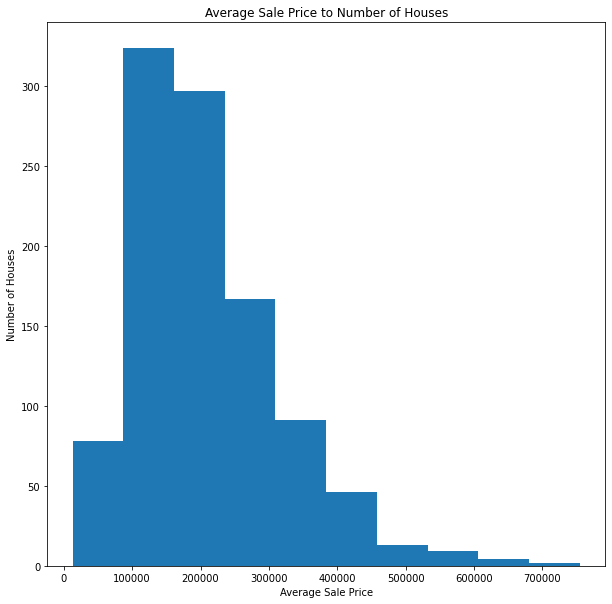

In [13]:
plt.figure(figsize=(10,10))
plt.hist(sale_df['SalePrice'])
plt.title('Average Sale Price to Number of Houses')
plt.ylabel('Number of Houses')
plt.xlabel('Average Sale Price')
plt.savefig('figures/salepricehist',bbox_inches='tight')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc961314f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9613304f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc961303970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc961330b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc961330eb0>],
 'means': []}

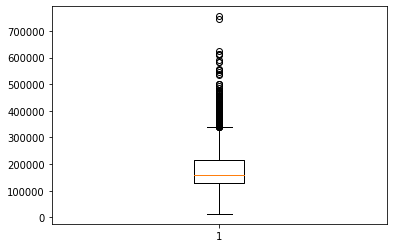

In [14]:
plt.boxplot(df['SalePrice'])

In [15]:
df['SalePrice'].describe()

count      2929.000000
mean     180806.263913
std       79898.423323
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [16]:
df['SalePrice'].value_counts()

135000    34
140000    33
130000    29
155000    28
145000    26
          ..
292500     1
446261     1
136870     1
313000     1
98300      1
Name: SalePrice, Length: 1031, dtype: int64

In [17]:
# confirming that the distribution is skewe
resp=df.SalePrice
from scipy.stats import shapiro
shapiro(resp)[1]

2.4102333586386854e-43

Since our shapiro numbber is extremely less than .05 we can determine that the distribution is not normal.  

Taking the square root looks like the best way to correct the skewness

In [18]:
shapiro(resp**.5)[1]

1.5292664963768345e-28

/Users/andreafung/opt/anaconda3/envs/springboard/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


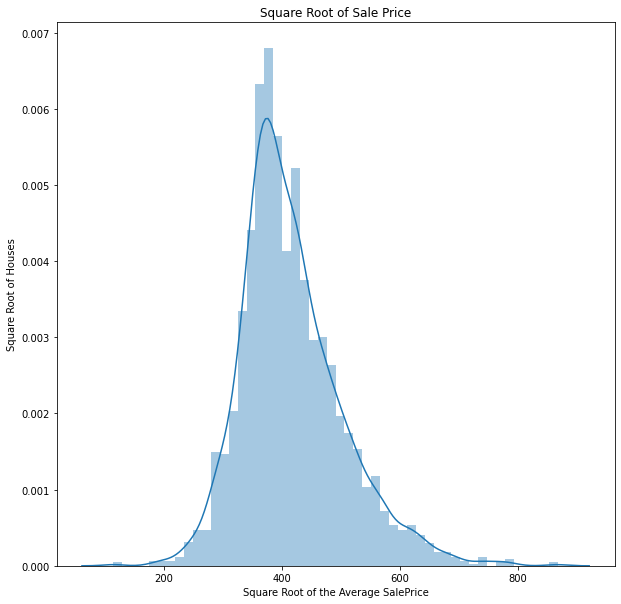

In [20]:
#graph of taking the square root of the sales price to fix skewness 
recip=resp**(.5)

#Plotting the figure
fig,ax=plt.subplots(figsize=(10,10))
p=sbn.distplot(recip)
plt.xlabel('Square Root of the Average SalePrice')
plt.ylabel('Square Root of Houses')
plt.title('Square Root of Sale Price')
fig=p.get_figure()
plt.savefig('figures/sqrtsaleprice',bbox_inches='tight')

In [21]:
recip

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

In [22]:
df['SalePrice']=recip

In [23]:
df['SalePrice']

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

/Users/andreafung/opt/anaconda3/envs/springboard/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

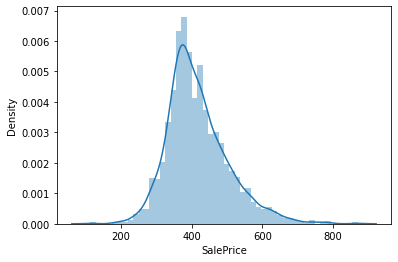

In [24]:
sbn.distplot(df['SalePrice'])

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

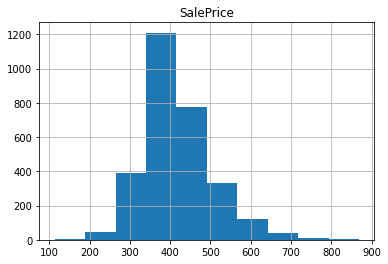

In [25]:
df.hist('SalePrice')

###  Creating Dummie variables
Creating dummie variables with all the categorical variables

Moving SalePrice to the first column

In [27]:
ddf=df.copy()

In [28]:
ddf['SalePrice']

0       463.680925
1       324.037035
2       414.728827
3       493.963561
4       435.775171
           ...    
2924    377.491722
2925    361.939221
2926    363.318042
2927    412.310563
2928    433.589668
Name: SalePrice, Length: 2929, dtype: float64

In [29]:
sp=ddf['SalePrice']
ddf.drop(labels=['SalePrice'], axis=1, inplace = True)
ddf.insert(0,'SalePrice',sp)

In [30]:
#changing all objects into categories
ddf[ddf.select_dtypes(['object']).columns] = ddf.select_dtypes(['object']).apply(lambda x: x.astype('category'))

Creating Dummy variables

In [31]:
df_dummie=pd.get_dummies(ddf,drop_first=True)

### Separating x and y variables

In [32]:
# explanatory variable
X=df_dummie.drop(['SalePrice'], axis=1)
# response variable 
y=df_dummie.SalePrice

### Creating Scaler objects

In [33]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [34]:
#creating the scaled X variable
scaled_x=scaler.fit_transform(X)

In [35]:
scaled_x.shape

(2929, 260)

In [36]:
y.shape

(2929,)

In [37]:
names=X.columns
scaled_X=pd.DataFrame(scaled_x,columns=names)

In [38]:
scaled_X.shape

(2929, 260)

# Splitting into training and test datasets

In [39]:
from sklearn.model_selection import train_test_split

#create 1-dimensional flattened array to our response variable
y=y.ravel()

#cal the train_test_split() function with the first two parameters
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=1)

# Modeling 

In [44]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Dummy Regressor
Using a dummy regressor to get a baseline model. 

In [42]:
#creating blank dataframe
metrics=pd.DataFrame(index=['r^2 score',
                            'mean^2 error','root mean^2 error',
                            'mean absolute error','explained variance'])

In [45]:
from sklearn.dummy import DummyRegressor
dummy_regr=DummyRegressor(strategy="mean")
dummy_regr.fit(X_train,y_train)
pred=dummy_regr.predict(X_test)
dummy_regr.score(X_test, y_test)
r2s=r2_score(y_test,pred)
mserror=(mean_squared_error(y_test,
                                pred))
rmserror=(np.sqrt(mean_squared_error(y_test,pred)))    
mabso=(mean_absolute_error(y_test,pred))
expvar=(explained_variance_score(y_test,pred))

metrics['Dummy Regressor']=(r2s,mserror,rmserror,mabso,expvar)

# Evaluating our model with OLSmodel
Using olsmodel to see which variables to exclude and further look at our model.  

In [47]:
olsmodel=sm.OLS(y_train,X_train)
olsmodel_results=olsmodel.fit()

In [48]:
olsmodel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     102.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:56:13   Log-Likelihood:                -10010.
No. Observations:                2196   AIC:                         2.052e+04
Df Residuals:                    1944   BIC:                         2.196e+04
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
MS.SubClass               -4.1101      2.784     -1.476      0.140      -9.570       1.350
Lot.Frontage               0.7459      0.869      0.858      0.391      -0.959       2.451
Lot.Area                   3.7624      0.849      4.433      0.000       2.098       5.427
Overall.Cond               9.3589      0.839     11.159      0.000       7.714      11.004
Year.Built                12.1593      1.988      6.118      0.000       8.261      16.057
Year.Remod.Add             2.6243      1.001      2.623      0.009       0.662       4.587
Mas.Vnr.Area               0.1977      0.888      0.223      0.824      -1.543       1.939
BsmtFin.SF.1               4.7178      0.837      5.635      0.000       3.076       6.360
BsmtFin.SF.2               2.1476      1.032      2.081      0.038       0.123       4.172
Bsmt.Unf.SF               -0.7390      0.722     -1.023      0.306      -2.155       0.677
Total.Bsmt.SF              4.9615      1.114      4.453      0.000       2.776       7.147
X1st.Flr.SF                9.3050      1.223      7.606      0.000       6.906      11.704
X2nd.Flr.SF               12.3701      1.339      9.241      0.000       9.745      14.995
Low.Qual.Fin.SF            0.4447      0.612      0.726      0.468      -0.756       1.646
Gr.Liv.Area               17.7353      1.016     17.454      0.000      15.743      19.728
Bsmt.Full.Bath             2.2309      0.859      2.598      0.009       0.547       3.915
Bsmt.Half.Bath            -1.0375      0.612     -1.696      0.090      -2.237       0.162
Full.Bath                  4.0583      1.020      3.980      0.000       2.059       6.058
Half.Bath                  0.8656      0.894      0.968      0.333      -0.888       2.620
Bedroom.AbvGr             -0.1532      0.931     -0.165      0.869      -1.978       1.672
Kitchen.AbvGr             -2.4672      1.045     -2.361      0.018      -4.516      -0.418
TotRms.AbvGrd             -0.7993      1.204     -0.664      0.507      -3.161       1.562
Fireplaces                 4.5505      1.413      3.221      0.001       1.780       7.322
Garage.Yr.Blt              6.7582     21.427      0.315      0.752     -35.264      48.780
Garage.Cars                4.4749      1.490      3.004      0.003       1.554       7.396
Garage.Area                4.2834      1.462      2.930      0.003       1.417       7.150
Wood.Deck.SF               0.8218      0.649      1.267      0.205      -0.451       2.094
Open.Porch.SF             -1.1339      0.630     -1.801      0.072      -2.369       0.101
Enclosed.Porch             1.2799      0.676      1.893      0.058      -0.046       2.606
X3Ssn.Porch               -0.7998      0.640     -1.250      0.212      -2.055       0.455
Screen.Porch               3.1869      0.580      5.494      0.000       2.049  

In [49]:
olsmodel_results.pvalues.argsort

<bound method Series.argsort of MS.SubClass               1.400292e-01
Lot.Frontage              3.910926e-01
Lot.Area                  9.826552e-06
Overall.Cond              4.523746e-28
Year.Built                1.145094e-09
                              ...     
Sale.Condition_AdjLand    1.073040e-03
Sale.Condition_Alloca     2.074555e-02
Sale.Condition_Family     4.788398e-01
Sale.Condition_Normal     6.566989e-06
Sale.Condition_Partial    7.715006e-01
Length: 260, dtype: float64>

In [50]:
olsmodel_results.pvalues.min

<bound method NDFrame._add_numeric_operations.<locals>.min of MS.SubClass               1.400292e-01
Lot.Frontage              3.910926e-01
Lot.Area                  9.826552e-06
Overall.Cond              4.523746e-28
Year.Built                1.145094e-09
                              ...     
Sale.Condition_AdjLand    1.073040e-03
Sale.Condition_Alloca     2.074555e-02
Sale.Condition_Family     4.788398e-01
Sale.Condition_Normal     6.566989e-06
Sale.Condition_Partial    7.715006e-01
Length: 260, dtype: float64>

# Running Other Models

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lr_model=linear_model.LinearRegression(normalize=True)
model_results= lr_model.fit(X_train, y_train)
pred=lr_model.predict(X_test)    
r2s=r2_score(y_test,pred)
mserror=(mean_squared_error(y_test,
                                pred))
rmserror=(np.sqrt(mean_squared_error(y_test,pred)))    
mabso=(mean_absolute_error(y_test,pred))
expvar=(explained_variance_score(y_test,pred))

metrics['Linear Regression']=(r2s,mserror,rmserror,mabso,expvar)

#  Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr=GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
pred=gbr.predict(X_test)
gbr.score(X_test,y_test)
r2s=r2_score(y_test,pred)
mserror=(mean_squared_error(y_test,
                                pred))
rmserror=(np.sqrt(mean_squared_error(y_test,pred)))    
mabso=(mean_absolute_error(y_test,pred))
expvar=(explained_variance_score(y_test,pred))

metrics['Gradient Boosting Regressor']=(r2s,mserror,rmserror,mabso,expvar)

##  Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train, y_train)
pred= rfr.predict(X_test)
rfr.score(X_test, y_test)
r2s=r2_score(y_test,pred)
mserror=(mean_squared_error(y_test,
                                pred))
rmserror=(np.sqrt(mean_squared_error(y_test,pred)))    
mabso=(mean_absolute_error(y_test,pred))
expvar=(explained_variance_score(y_test,pred))

metrics['Random Forest Regressor']=(r2s,mserror,rmserror,mabso,expvar)

## Lasso Regression 


In [54]:
from sklearn.linear_model import Lasso
las=Lasso(alpha=.05)
las.fit(X_train, y_train)
pred=las.predict(X_test)
las.score(X_test, y_test)
r2s=r2_score(y_test,pred)
mserror=(mean_squared_error(y_test,
                                pred))
rmserror=(np.sqrt(mean_squared_error(y_test,pred)))    
mabso=(mean_absolute_error(y_test,pred))
expvar=(explained_variance_score(y_test,pred))

metrics['Lasso(95)']=(r2s,mserror,rmserror,mabso,expvar)

# Ridge


In [55]:
from sklearn.linear_model import Ridge
Rig=Ridge()
Rig.fit(X_train,y_train)
pred=Rig.predict(X_test)
r2s=(r2_score(y_test,Rig.predict(X_test)))
mserror=(mean_squared_error(y_test,Rig.predict(X_test)))
rmserror=(mean_squared_error(y_test,Rig.predict(X_test))**.5)
mabso=(mean_absolute_error(y_test,Rig.predict(X_test)))
expvar=(explained_variance_score(y_test,Rig.predict(X_test)))
metrics['Ridge']=r2s,mserror,rmserror,mabso,expvar

# Elastic Net

In [56]:
from sklearn.linear_model import ElasticNet
EN=ElasticNet(l1_ratio=.95)
EN.fit(X_train,y_train)
pred=EN.predict(X_test)
r2s=(r2_score(y_test,Rig.predict(X_test)))
mserror=(mean_squared_error(y_test,Rig.predict(X_test)))
rmserror=(mean_squared_error(y_test,Rig.predict(X_test))**.5)
mabso=(mean_absolute_error(y_test,Rig.predict(X_test)))
expvar=(explained_variance_score(y_test,Rig.predict(X_test)))
metrics['ElasticNet(ratio=.95)']=r2s,mserror,rmserror,mabso,expvar

In [61]:
metrics

,Dummy Regressor,Linear Regression,Gradient Boosting Regressor,Random Forest Regressor,Lasso(95),Ridge,ElasticNet(ratio=.95)
r^2 score,-0.007095,-1.140936e+21,0.909347,0.899267,0.918715,0.917336,0.917336
mean^2 error,7382.814710,8.363978e+24,664.556133,738.456635,595.885168,605.997064,605.997064
root mean^2 error,85.923307,2.892054e+12,25.778986,27.174559,24.410759,24.617008,24.617008
mean absolute error,66.478911,1.114856e+11,17.445090,18.295925,16.791459,16.968057,16.968057
explained variance,0.000000,-1.139241e+21,0.909347,0.899508,0.918769,0.917359,0.917359


In [62]:
metrics.to_csv('/Users/andreafung/Dropbox/Springboard/guided capstone/metrics.csv')

###  Our RMSE and Mean Absolute Evaluation and R squared
The error is extremely large which means that although our scores are high the predictions' error are not within a range that is acceptable.  We would like the mean square error to be smaller.  We would like the r squared to be a positive number not a negative number which means that there is a bad fit.   

##### Possible next steps
1. Evaluate which variables to keep and which variables to delete that have the least affect on the model. 
2. Combine variables that have high correlations with each other/ 
3. Feature engineer new variables. 

Then re-run model for better results.  